In [1]:
import xgboost as xgb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio

In [3]:
# Train data

las1 = lasio.read("../well-log-data/15_9-13.las")
las2 = lasio.read("../well-log-data/16_8-1.las")
las3 = lasio.read("../well-log-data/25_11-5.las")
las4 = lasio.read("../well-log-data/25_6-3.las")

In [4]:
# convert las files to dataframe

df1 = las1.df()
df2 = las2.df()
df3 = las3.df()
df4 = las4.df()

In [5]:
df4.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,MUDWEIGHT,ROP,RDEP,RSHA,RMED,RMIC,SP,DTS,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,
138.099729,NaN,NaN,NaN,NaN,NaN,32.879009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.251729,NaN,NaN,NaN,NaN,NaN,32.929207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.403729,NaN,NaN,NaN,NaN,NaN,32.979416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.555729,NaN,NaN,NaN,NaN,NaN,33.029613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138.707729,NaN,NaN,NaN,NaN,NaN,33.117496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RSHA                               1623 non-null   float64
 7   RMED                               20957 non-null  float64
 8   RXO                                1627 non-null   float64
 9   SP                                 20956 non-null  float64
 10  DTC                                21282 non-null  float64
 11  NPHI                               14105 no

None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  6700 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   6685 non-null   float64
 2   CALI                               6709 non-null   float64
 3   MUDWEIGHT                          13706 non-null  float64
 4   ROP                                14418 non-null  float64
 5   RDEP                               11888 non-null  float64
 6   RSHA                               11888 non-null  float64
 7   RMED                               11887 non-null  float64
 8   SP                                 11888 non-null  float64
 9   DTC                                13935 non-null  float64
 10  NPHI                               4987 non-null   float64
 11  GR                         

None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  5059 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   5060 non-null   float64
 2   CALI                               11777 non-null  float64
 3   BS                                 13266 non-null  float64
 4   DCAL                               11777 non-null  float64
 5   MUDWEIGHT                          12783 non-null  float64
 6   ROP                                12807 non-null  float64
 7   RDEP                               11730 non-null  float64
 8   RMED                               11731 non-null  float64
 9   SP                                 11686 non-null  float64
 10  DTC                                10571 non-null  float64
 11  NPHI                       

None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RSHA                               8245 non-null   float64
 8   RMED                               14972 non-null  float64
 9   RMIC                               8246 non-null   float64
 10  SP                                 5020 non-null   float64
 11  DTS                        

None

In [7]:
display(df1.isna().sum())
display(df2.isna().sum())
display(df3.isna().sum())
display(df4.isna().sum())

FORCE_2020_LITHOFACIES_CONFIDENCE     3164
FORCE_2020_LITHOFACIES_LITHOLOGY      3171
CALI                                  3096
MUDWEIGHT                             3921
ROP                                   1144
RDEP                                   485
RSHA                                 19818
RMED                                   484
RXO                                  19814
SP                                     485
DTC                                    159
NPHI                                  7336
PEF                                   4995
GR                                     541
RHOB                                  3096
DRHO                                  3096
DEPTH_MD                               485
X_LOC                                  485
Y_LOC                                  485
Z_LOC                                  485
dtype: int64

FORCE_2020_LITHOFACIES_CONFIDENCE    7886
FORCE_2020_LITHOFACIES_LITHOLOGY     7901
CALI                                 7877
MUDWEIGHT                             880
ROP                                   168
RDEP                                 2698
RSHA                                 2698
RMED                                 2699
SP                                   2698
DTC                                   651
NPHI                                 9599
GR                                     46
RHOB                                 7877
DRHO                                 7874
DEPTH_MD                             2698
X_LOC                                2698
Y_LOC                                2698
Z_LOC                                2698
dtype: int64

FORCE_2020_LITHOFACIES_CONFIDENCE    8278
FORCE_2020_LITHOFACIES_LITHOLOGY     8277
CALI                                 1560
BS                                     71
DCAL                                 1560
MUDWEIGHT                             554
ROP                                   530
RDEP                                 1607
RMED                                 1606
SP                                   1651
DTC                                  2766
NPHI                                 6677
GR                                     58
RHOB                                 8178
DRHO                                 8180
DEPTH_MD                             1607
X_LOC                                1607
Y_LOC                                1607
Z_LOC                                1607
dtype: int64

FORCE_2020_LITHOFACIES_CONFIDENCE     3379
FORCE_2020_LITHOFACIES_LITHOLOGY      3394
CALI                                  3349
BS                                     328
MUDWEIGHT                             7158
ROP                                     16
RDEP                                   375
RSHA                                  7143
RMED                                   416
RMIC                                  7142
SP                                   10368
DTS                                   3269
DTC                                   3218
NPHI                                  7167
GR                                     494
RHOB                                  7141
DEPTH_MD                               375
X_LOC                                  375
Y_LOC                                  375
Z_LOC                                  375
dtype: int64

## Drop curves that have <70% of total entries

In [8]:
df1 = df1.drop(["RSHA", "RXO", "RHOB", "DRHO"], axis=1)
df2 = df2.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "RHOB", "DRHO"], axis=1)
df3 = df3.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "RHOB", "DRHO"], axis=1)
df4 = df4.drop(["RSHA", "RMIC", "RHOB"], axis=1)

In [9]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RMED                               20957 non-null  float64
 7   SP                                 20956 non-null  float64
 8   DTC                                21282 non-null  float64
 9   NPHI                               14105 non-null  float64
 10  PEF                                16446 non-null  float64
 11  GR                                 20900 no

None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       6709 non-null   float64
 1   MUDWEIGHT  13706 non-null  float64
 2   ROP        14418 non-null  float64
 3   RDEP       11888 non-null  float64
 4   RSHA       11888 non-null  float64
 5   RMED       11887 non-null  float64
 6   SP         11888 non-null  float64
 7   DTC        13935 non-null  float64
 8   NPHI       4987 non-null   float64
 9   GR         14540 non-null  float64
 10  DEPTH_MD   11888 non-null  float64
 11  X_LOC      11888 non-null  float64
 12  Y_LOC      11888 non-null  float64
 13  Z_LOC      11888 non-null  float64
dtypes: float64(14)
memory usage: 1.7 MB


None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       11777 non-null  float64
 1   BS         13266 non-null  float64
 2   DCAL       11777 non-null  float64
 3   MUDWEIGHT  12783 non-null  float64
 4   ROP        12807 non-null  float64
 5   RDEP       11730 non-null  float64
 6   RMED       11731 non-null  float64
 7   SP         11686 non-null  float64
 8   DTC        10571 non-null  float64
 9   NPHI       6660 non-null   float64
 10  GR         13279 non-null  float64
 11  DEPTH_MD   11730 non-null  float64
 12  X_LOC      11730 non-null  float64
 13  Y_LOC      11730 non-null  float64
 14  Z_LOC      11730 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB


None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RMED                               14972 non-null  float64
 8   SP                                 5020 non-null   float64
 9   DTS                                12119 non-null  float64
 10  DTC                                12170 non-null  float64
 11  NPHI                       

None

## Drop curves that have <70% of total entries

In [8]:
df1 = df1.drop(["RSHA", "RXO", "RHOB", "DRHO"], axis=1)
df2 = df2.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "RHOB", "DRHO"], axis=1)
df3 = df3.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "RHOB", "DRHO"], axis=1)
df4 = df4.drop(["RSHA", "RMIC", "RHOB"], axis=1)

In [9]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RMED                               20957 non-null  float64
 7   SP                                 20956 non-null  float64
 8   DTC                                21282 non-null  float64
 9   NPHI                               14105 non-null  float64
 10  PEF                                16446 non-null  float64
 11  GR                                 20900 no

None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       6709 non-null   float64
 1   MUDWEIGHT  13706 non-null  float64
 2   ROP        14418 non-null  float64
 3   RDEP       11888 non-null  float64
 4   RSHA       11888 non-null  float64
 5   RMED       11887 non-null  float64
 6   SP         11888 non-null  float64
 7   DTC        13935 non-null  float64
 8   NPHI       4987 non-null   float64
 9   GR         14540 non-null  float64
 10  DEPTH_MD   11888 non-null  float64
 11  X_LOC      11888 non-null  float64
 12  Y_LOC      11888 non-null  float64
 13  Z_LOC      11888 non-null  float64
dtypes: float64(14)
memory usage: 1.7 MB


None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       11777 non-null  float64
 1   BS         13266 non-null  float64
 2   DCAL       11777 non-null  float64
 3   MUDWEIGHT  12783 non-null  float64
 4   ROP        12807 non-null  float64
 5   RDEP       11730 non-null  float64
 6   RMED       11731 non-null  float64
 7   SP         11686 non-null  float64
 8   DTC        10571 non-null  float64
 9   NPHI       6660 non-null   float64
 10  GR         13279 non-null  float64
 11  DEPTH_MD   11730 non-null  float64
 12  X_LOC      11730 non-null  float64
 13  Y_LOC      11730 non-null  float64
 14  Z_LOC      11730 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB


None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  12009 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   11994 non-null  float64
 2   CALI                               12039 non-null  float64
 3   BS                                 15060 non-null  float64
 4   MUDWEIGHT                          8230 non-null   float64
 5   ROP                                15372 non-null  float64
 6   RDEP                               15013 non-null  float64
 7   RMED                               14972 non-null  float64
 8   SP                                 5020 non-null   float64
 9   DTS                                12119 non-null  float64
 10  DTC                                12170 non-null  float64
 11  NPHI                       

None

## Drop curves that is not present in all datasets

In [10]:
df1 = df1.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "PEF"], axis=1)
df2 = df2.drop(["RSHA"], axis=1)
df3 = df3.drop(["BS", "DCAL"], axis=1)
df4 = df4.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "BS", "DTS"], axis=1)

In [11]:
print("df1")
display(df1.info())
print("/n df2")
display(df2.info())
print("/n df3")
display(df3.info())
print("/n df4")
display(df4.info())

df1
<class 'pandas.core.frame.DataFrame'>
Float64Index: 21441 entries, 25.0 to 3283.88
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       18345 non-null  float64
 1   MUDWEIGHT  17520 non-null  float64
 2   ROP        20297 non-null  float64
 3   RDEP       20956 non-null  float64
 4   RMED       20957 non-null  float64
 5   SP         20956 non-null  float64
 6   DTC        21282 non-null  float64
 7   NPHI       14105 non-null  float64
 8   GR         20900 non-null  float64
 9   DEPTH_MD   20956 non-null  float64
 10  X_LOC      20956 non-null  float64
 11  Y_LOC      20956 non-null  float64
 12  Z_LOC      20956 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


None

/n df2
<class 'pandas.core.frame.DataFrame'>
Float64Index: 14586 entries, 96.975196838 to 2313.8951968
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       6709 non-null   float64
 1   MUDWEIGHT  13706 non-null  float64
 2   ROP        14418 non-null  float64
 3   RDEP       11888 non-null  float64
 4   RMED       11887 non-null  float64
 5   SP         11888 non-null  float64
 6   DTC        13935 non-null  float64
 7   NPHI       4987 non-null   float64
 8   GR         14540 non-null  float64
 9   DEPTH_MD   11888 non-null  float64
 10  X_LOC      11888 non-null  float64
 11  Y_LOC      11888 non-null  float64
 12  Z_LOC      11888 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB


None

/n df3
<class 'pandas.core.frame.DataFrame'>
Float64Index: 13337 entries, 146.60871887 to 2173.6807189
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       11777 non-null  float64
 1   MUDWEIGHT  12783 non-null  float64
 2   ROP        12807 non-null  float64
 3   RDEP       11730 non-null  float64
 4   RMED       11731 non-null  float64
 5   SP         11686 non-null  float64
 6   DTC        10571 non-null  float64
 7   NPHI       6660 non-null   float64
 8   GR         13279 non-null  float64
 9   DEPTH_MD   11730 non-null  float64
 10  X_LOC      11730 non-null  float64
 11  Y_LOC      11730 non-null  float64
 12  Z_LOC      11730 non-null  float64
dtypes: float64(13)
memory usage: 1.4 MB


None

/n df4
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15388 entries, 138.09972888 to 2476.9237289
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       12039 non-null  float64
 1   MUDWEIGHT  8230 non-null   float64
 2   ROP        15372 non-null  float64
 3   RDEP       15013 non-null  float64
 4   RMED       14972 non-null  float64
 5   SP         5020 non-null   float64
 6   DTC        12170 non-null  float64
 7   NPHI       8221 non-null   float64
 8   GR         14894 non-null  float64
 9   DEPTH_MD   15013 non-null  float64
 10  X_LOC      15013 non-null  float64
 11  Y_LOC      15013 non-null  float64
 12  Z_LOC      15013 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB


None

In [12]:
df1.describe()

,CALI,MUDWEIGHT,ROP,RDEP,RMED,SP,DTC,NPHI,GR,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,18345.000000,17520.000000,20297.000000,20956.000000,20957.000000,20956.000000,21282.000000,14105.000000,20900.000000,20956.000000,20956.000000,2.095600e+04,20956.000000
mean,14.766734,0.139824,28.554482,1.934587,1.777486,60.649891,132.228668,0.403497,63.127582,1691.300000,437628.925584,6.470978e+06,-1666.082887
std,4.386417,0.009479,30.589891,2.759186,2.739401,45.827110,33.646244,0.134053,28.701134,919.542309,14.342905,3.677640e+00,919.344110
min,8.186605,0.129413,0.138586,0.352202,0.116862,-149.232254,55.726753,0.024330,6.191506,98.720001,437592.906250,6.470972e+06,-3257.997803
25%,12.101601,0.133007,5.249922,0.830621,0.780284,31.746324,95.920670,0.314235,41.265792,895.009979,437616.375000,6.470975e+06,-2462.194214
50%,13.896447,0.136602,31.011793,1.386364,1.230179,58.188791,144.200439,0.447975,66.990936,1691.299988,437636.234375,6.470978e+06,-1666.196960
75%,18.301279,0.144990,40.664753,2.047000,1.972084,80.050549,153.726254,0.506147,82.098042,2487.590027,437640.937500,6.470982e+06,-869.973602
max,23.329569,0.156973,1083.425415,168.014252,142.606338,153.096802,206.225693,0.800262,499.022583,3283.879883,437642.812500,6.470984e+06,-73.719467


In [13]:
display(df1.shape,df2.shape,df3.shape, df4.shape)

(21441, 13)

(14586, 13)

(13337, 13)

(15388, 13)

In [14]:
merged_df = pd.concat([df1, df2, df3, df4])
merged_df.shape

(64752, 13)

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       48870 non-null  float64
 1   MUDWEIGHT  52239 non-null  float64
 2   ROP        62894 non-null  float64
 3   RDEP       59587 non-null  float64
 4   RMED       59547 non-null  float64
 5   SP         49550 non-null  float64
 6   DTC        57958 non-null  float64
 7   NPHI       33973 non-null  float64
 8   GR         63613 non-null  float64
 9   DEPTH_MD   59587 non-null  float64
 10  X_LOC      59587 non-null  float64
 11  Y_LOC      59587 non-null  float64
 12  Z_LOC      59587 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [16]:
merged_df.isna().sum()

CALI         15882
MUDWEIGHT    12513
ROP           1858
RDEP          5165
RMED          5205
SP           15202
DTC           6794
NPHI         30779
GR            1139
DEPTH_MD      5165
X_LOC         5165
Y_LOC         5165
Z_LOC         5165
dtype: int64

In [17]:
merged_df.describe()

,CALI,MUDWEIGHT,ROP,RDEP,RMED,SP,DTC,NPHI,GR,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,48870.000000,52239.000000,62894.000000,59587.000000,59547.000000,49550.000000,57958.000000,33973.000000,63613.000000,59587.000000,59587.000000,5.958700e+04,59587.000000
mean,12.788625,0.684048,54.393476,1.517735,1.426824,45.390648,135.579075,0.435766,59.023666,1463.878902,463239.391666,6.527961e+06,-1438.956239
std,3.585482,0.538459,87.445839,2.061031,1.914200,34.981068,27.794104,0.136695,26.662202,736.781811,22338.931773,6.243687e+04,736.529411
min,7.073111,0.129413,0.138586,0.202688,0.116862,-149.232254,50.758595,-0.032620,0.624403,98.720001,437592.906250,6.470972e+06,-3257.997803
25%,9.413469,0.144990,7.321400,0.772081,0.767704,34.682085,121.810505,0.339636,39.822582,862.483612,437640.843750,6.470982e+06,-1969.635498
50%,12.593809,1.042490,31.279211,1.154419,1.121041,41.343777,142.874123,0.451603,59.197601,1428.567993,463756.000000,6.479872e+06,-1403.708740
75%,14.212363,1.198264,53.346992,1.665462,1.553793,55.820948,151.725235,0.524652,75.684013,1994.620361,495696.468750,6.618248e+06,-837.791046
max,23.329569,1.389986,1083.425415,168.014252,142.606338,153.096802,206.225693,0.993175,499.022583,3283.879883,495739.343750,6.618270e+06,-73.719467


In [18]:
merged_df.columns

Index(['CALI', 'MUDWEIGHT', 'ROP', 'RDEP', 'RMED', 'SP', 'DTC', 'NPHI', 'GR',
       'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC'],
      dtype='object')

## Drop all of the missing values

In [19]:
dropped_missing_merged_df = pd.concat([df1, df2, df3, df4])
dropped_missing_merged_df.dropna(inplace=True)

In [20]:
dropped_missing_merged_df.isna().sum()

CALI         0
MUDWEIGHT    0
ROP          0
RDEP         0
RMED         0
SP           0
DTC          0
NPHI         0
GR           0
DEPTH_MD     0
X_LOC        0
Y_LOC        0
Z_LOC        0
dtype: int64

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       48870 non-null  float64
 1   MUDWEIGHT  52239 non-null  float64
 2   ROP        62894 non-null  float64
 3   RDEP       59587 non-null  float64
 4   RMED       59547 non-null  float64
 5   SP         49550 non-null  float64
 6   DTC        57958 non-null  float64
 7   NPHI       33973 non-null  float64
 8   GR         63613 non-null  float64
 9   DEPTH_MD   59587 non-null  float64
 10  X_LOC      59587 non-null  float64
 11  Y_LOC      59587 non-null  float64
 12  Z_LOC      59587 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [22]:
dropped_missing_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 25272 entries, 1138.704 to 2159.8487189
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       25272 non-null  float64
 1   MUDWEIGHT  25272 non-null  float64
 2   ROP        25272 non-null  float64
 3   RDEP       25272 non-null  float64
 4   RMED       25272 non-null  float64
 5   SP         25272 non-null  float64
 6   DTC        25272 non-null  float64
 7   NPHI       25272 non-null  float64
 8   GR         25272 non-null  float64
 9   DEPTH_MD   25272 non-null  float64
 10  X_LOC      25272 non-null  float64
 11  Y_LOC      25272 non-null  float64
 12  Z_LOC      25272 non-null  float64
dtypes: float64(13)
memory usage: 2.7 MB


## Import test dataset

In [23]:
las5 = lasio.read("../well-log-data/31_2-21 S.las")
df5 = las5.df()

In [24]:
merged_df.isna().sum()

CALI         15882
MUDWEIGHT    12513
ROP           1858
RDEP          5165
RMED          5205
SP           15202
DTC           6794
NPHI         30779
GR            1139
DEPTH_MD      5165
X_LOC         5165
Y_LOC         5165
Z_LOC         5165
dtype: int64

In [25]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   BS                                 18674 non-null  float64
 4   ROPA                               18680 non-null  float64
 5   ROP                                18664 non-null  float64
 6   RDEP                               18567 non-null  float64
 7   RMED                               18524 non-null  float64
 8   DTS                                15252 non-null  float64
 9   DTC                                18199 non-null  float64
 10  NPHI                               7835 non-null   float64
 11  PEF                                7800 n

In [26]:
df5 = df5.drop(["FORCE_2020_LITHOFACIES_CONFIDENCE", "FORCE_2020_LITHOFACIES_LITHOLOGY", "BS", "DTS", "ROPA", "DTS", "PEF", "RHOB", "DRHO"], axis=1)

In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      7842 non-null   float64
 1   ROP       18664 non-null  float64
 2   RDEP      18567 non-null  float64
 3   RMED      18524 non-null  float64
 4   DTC       18199 non-null  float64
 5   NPHI      7835 non-null   float64
 6   GR        18666 non-null  float64
 7   DEPTH_MD  18567 non-null  float64
 8   X_LOC     18567 non-null  float64
 9   Y_LOC     18567 non-null  float64
 10  Z_LOC     18567 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CALI       48870 non-null  float64
 1   MUDWEIGHT  52239 non-null  float64
 2   ROP        62894 non-null  float64
 3   RDEP       59587 non-null  float64
 4   RMED       59547 non-null  float64
 5   SP         49550 non-null  float64
 6   DTC        57958 non-null  float64
 7   NPHI       33973 non-null  float64
 8   GR         63613 non-null  float64
 9   DEPTH_MD   59587 non-null  float64
 10  X_LOC      59587 non-null  float64
 11  Y_LOC      59587 non-null  float64
 12  Z_LOC      59587 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


since df5 doesn't have Mudweight and sp curves, we would need to drop them from the merged_df dataset

In [29]:
merged_df = merged_df.drop(["MUDWEIGHT", "SP"], axis=1)

In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 64752 entries, 25.0 to 2476.9237289
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      48870 non-null  float64
 1   ROP       62894 non-null  float64
 2   RDEP      59587 non-null  float64
 3   RMED      59547 non-null  float64
 4   DTC       57958 non-null  float64
 5   NPHI      33973 non-null  float64
 6   GR        63613 non-null  float64
 7   DEPTH_MD  59587 non-null  float64
 8   X_LOC     59587 non-null  float64
 9   Y_LOC     59587 non-null  float64
 10  Z_LOC     59587 non-null  float64
dtypes: float64(11)
memory usage: 5.9 MB


In [31]:
merged_df.isna().sum()

CALI        15882
ROP          1858
RDEP         5165
RMED         5205
DTC          6794
NPHI        30779
GR           1139
DEPTH_MD     5165
X_LOC        5165
Y_LOC        5165
Z_LOC        5165
dtype: int64

## drop rows where GR has null values

In [32]:
merged_df.dropna(subset=["GR"], inplace=True)

In [33]:
df5.dropna(subset=["GR"], inplace=True)

In [34]:
merged_df.isna().sum()

CALI        14892
ROP          1227
RDEP         4304
RMED         4344
DTC          6255
NPHI        29746
GR              0
DEPTH_MD     4304
X_LOC        4304
Y_LOC        4304
Z_LOC        4304
dtype: int64

## Split dataset into X_train and y_train

In [35]:
X_train = merged_df.drop("GR", axis=1)
y_train = merged_df["GR"]

In [36]:
y_train.info()

<class 'pandas.core.series.Series'>
Float64Index: 63613 entries, 98.568 to 2450.4757289
Series name: GR
Non-Null Count  Dtype  
--------------  -----  
63613 non-null  float64
dtypes: float64(1)
memory usage: 994.0 KB


## Split dataset into X_test and y_test

In [37]:
df5.isna().sum()

CALI        10824
ROP            10
RDEP           99
RMED          142
DTC           467
NPHI        10831
GR              0
DEPTH_MD       99
X_LOC          99
Y_LOC          99
Z_LOC          99
dtype: int64

In [38]:
X_test = df5.drop("GR", axis=1)
y_test = df5["GR"]

In [39]:
y_test.info()

<class 'pandas.core.series.Series'>
Float64Index: 18666 entries, 379.9124 to 3216.9924
Series name: GR
Non-Null Count  Dtype  
--------------  -----  
18666 non-null  float64
dtypes: float64(1)
memory usage: 291.7 KB


## Creating an XGBoost model

In [40]:
model = xgb.XGBRegressor()

In [41]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
model.score(X_test, y_test)

-0.8246379559603916

## Create RandomForestRegressor model

In [43]:
dropped_missing_merged_df = dropped_missing_merged_df.drop(["MUDWEIGHT", "SP"], axis=1)
dropped_missing_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 25272 entries, 1138.704 to 2159.8487189
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CALI      25272 non-null  float64
 1   ROP       25272 non-null  float64
 2   RDEP      25272 non-null  float64
 3   RMED      25272 non-null  float64
 4   DTC       25272 non-null  float64
 5   NPHI      25272 non-null  float64
 6   GR        25272 non-null  float64
 7   DEPTH_MD  25272 non-null  float64
 8   X_LOC     25272 non-null  float64
 9   Y_LOC     25272 non-null  float64
 10  Z_LOC     25272 non-null  float64
dtypes: float64(11)
memory usage: 2.3 MB


In [44]:
dropped_missing_merged_df
X_train_isna = dropped_missing_merged_df.drop("GR", axis=1)
y_train_isna = dropped_missing_merged_df["GR"]

In [45]:
dropped_missing_df5 = df5
dropped_missing_df5.dropna(inplace=True)


In [46]:
X_test_isna = dropped_missing_df5.drop("GR", axis=1)
y_test_isna = dropped_missing_df5["GR"]

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_isna, y_train_isna)

RandomForestRegressor()

In [48]:
reg.score(X_test_isna, y_test_isna)

-2.116121779249736

## Predict test dataset

In [51]:
y_preds = model.predict(X_test)
y_preds_isna = reg.predict(X_test_isna)

Evaluation using the R2_score

In [65]:
from sklearn.metrics import r2_score

# evaluate for XGB
model_r2 = r2_score(y_test, y_preds)

# evaluate for RandomForestRegressor
reg_r2 = r2_score(y_test_isna, y_preds_isna)

print(f"XBG: {model_r2} \n reg: {reg_r2}")

XBG: -0.8246379559603916 
 reg: -2.116121779249736


Evaluation using the Mean Absolute Error(MAE)

In [66]:
from sklearn.metrics import mean_absolute_error

# evaluate for XGB
model_mae = mean_absolute_error(y_test, y_preds)

# evaluate for RandomForestRegressor
reg_mae = mean_absolute_error(y_test_isna, y_preds_isna)

print(f"XBG: {model_mae} \n reg: {reg_mae}")

XBG: 30.44354664487799 
 reg: 50.73789681832901


Evaluation using the Root Mean Squared Error(RMSE)

In [63]:
from sklearn.metrics import mean_squared_error

# evaluate for XGB
model_mse = mean_squared_error(y_test, y_preds)

# evaluate for RandomForestRegressor
reg_mse = mean_squared_error(y_test_isna, y_preds_isna)

print(f"XBG: {model_mse} \n reg: {reg_mse}")

XBG: 1433.485627139705 
 reg: 4226.809415743111


In [60]:
print(y_preds)
print(np.array(y_test))

[38.30192  62.451103 60.58245  ... 25.444105 30.385832 30.608673]
[60.60709763 59.35948944 64.67589569 ... 43.69320679 47.92513657
 50.48729706]


## Create dataframe for evaluation

#### XGBoost model evaluation

In [69]:
XGB_df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
XGB_df["differences"] = XGB_df["predicted values"] - XGB_df["actual values"]
XGB_df["squared differences"] = np.square(XGB_df["differences"])

In [71]:
XGB_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18666 entries, 379.9124 to 3216.9924
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actual values        18666 non-null  float64
 1   predicted values     18666 non-null  float32
 2   differences          18666 non-null  float64
 3   squared differences  18666 non-null  float64
dtypes: float32(1), float64(3)
memory usage: 656.2 KB


In [76]:
XGB_df.reset_index(inplace=True)
XGB_df.head()

,DEPT,actual values,predicted values,differences,squared differences
0,379.9124,60.607098,38.301922,-22.305176,497.520867
1,380.0644,59.359489,62.451103,3.091614,9.558076
2,380.2164,64.675896,60.582451,-4.093445,16.756291
3,380.3684,70.001129,58.232426,-11.768703,138.502381
4,380.5204,66.046501,58.232426,-7.814075,61.059775


#### RandomForestRegressor model evaluation

In [73]:
reg_df = pd.DataFrame(data={"actual values": y_test_isna ,
                       "predicted values": y_preds_isna})
reg_df["differences"] = reg_df["predicted values"] - reg_df["actual values"]
reg_df["squared differences"] = np.square(reg_df["differences"])

In [74]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7684 entries, 1999.7764 to 3168.2004
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   actual values        7684 non-null   float64
 1   predicted values     7684 non-null   float64
 2   differences          7684 non-null   float64
 3   squared differences  7684 non-null   float64
dtypes: float64(4)
memory usage: 300.2 KB


In [77]:
reg_df.reset_index(inplace=True)
reg_df.head()

,DEPT,actual values,predicted values,differences,squared differences
0,1999.7764,73.137222,62.717045,-10.420177,108.580085
1,1999.9284,53.532814,69.665976,16.133162,260.278930
2,2000.0804,44.329887,68.661838,24.331951,592.043828
3,2000.2324,34.112160,74.626453,40.514293,1641.407919
4,2000.3844,31.661253,62.937389,31.276136,978.196689


# Plot actual and predicted values of the XGBoost model
   ## A Gamma Log

In [78]:
XGB_df.describe()

,DEPT,actual values,predicted values,differences,squared differences
count,18666.000000,18666.000000,18666.000000,18666.000000,18666.000000
mean,1798.452400,88.059741,64.294373,-23.765232,1433.485627
std,819.060268,28.029797,19.732414,29.474496,2096.836301
min,379.912400,9.397405,10.517707,-147.128944,0.000006
25%,1089.182400,72.368660,50.995522,-39.821370,181.923570
50%,1798.452400,89.986179,64.913330,-23.489094,688.278660
75%,2507.722400,100.472012,75.504219,-8.097262,1766.311331
max,3216.992400,243.851028,233.768021,164.464134,27048.451443


Text(0.5, 1.06, 'Plot of Actual and Predicted Gamma Log Value (XGB model)')

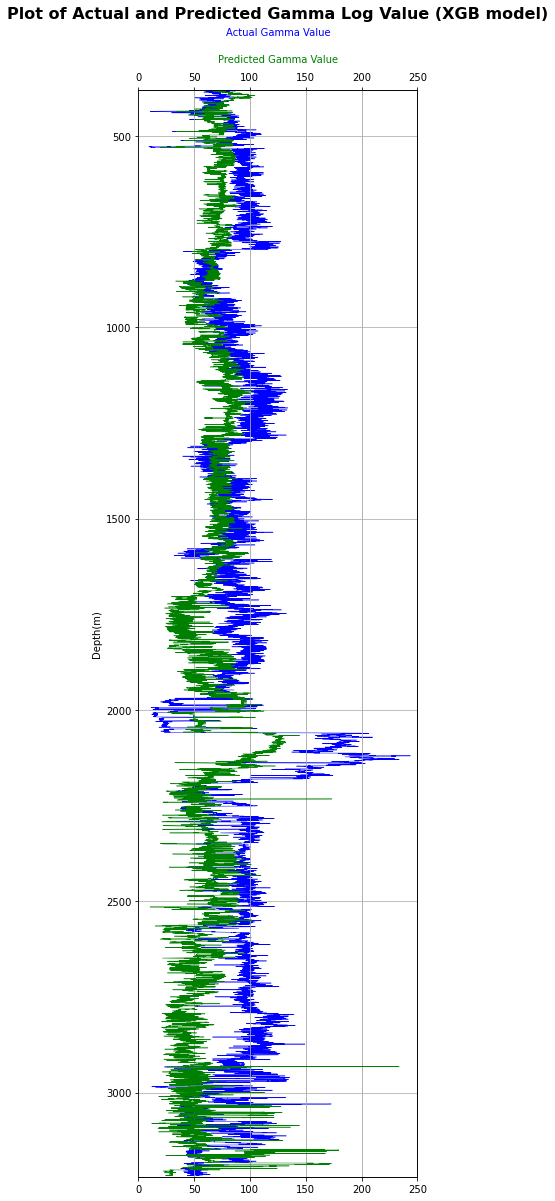

In [102]:
fig, ((ax1))= plt.subplots(nrows=1,
                        ncols=1,
                        figsize=(5,20))
ax1.plot("actual values", "DEPT", data=XGB_df, color="blue", lw=0.5)
ax1.set(xlabel="Actual Gamma Value",
      ylabel="Depth(m)",
       xlim=(0, 250),
       ylim=(3220, 379))
ax1.grid()
ax2 = ax1.twiny()
ax2.plot("predicted values", "DEPT", data=XGB_df, color="green", lw=0.5)
ax2.set(xlabel="Predicted Gamma Value",
        xlim=(0, 250),
       ylim=(3220, 379))
ax2.grid()

# Set the color of x-axis labels
ax1.xaxis.label.set_color('blue')
ax2.xaxis.label.set_color('green')


ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")

# Set the position coordinate of x-axis labels higher
ax1.xaxis.set_label_coords(0.5, 1.05)
ax2.xaxis.set_label_coords(0.5, 1.025)

plt.title("Plot of Actual and Predicted Gamma Log Value (XGB model)", fontsize=16, fontweight="bold", y=1.06)

# Plot actual and predicted values of the RandomForestRegressor model
   ## A Gamma Log

In [82]:
reg_df.describe()

,DEPT,actual values,predicted values,differences,squared differences
count,7684.000000,7684.000000,7684.000000,7684.000000,7684.000000
mean,2583.805858,93.843116,108.975380,15.132264,4226.809416
std,337.353658,36.832177,50.598346,63.232463,6554.659082
min,1999.776400,11.948602,19.950835,-149.686226,0.002429
25%,2291.730400,74.547047,70.785991,-26.660535,544.264036
50%,2583.684400,95.108906,82.204810,15.025099,1093.653990
75%,2875.638400,104.697561,150.144835,47.257840,4934.218904
max,3168.200400,243.851028,294.741691,240.942300,58053.191899


Text(0.5, 1.06, 'Plot of Actual and Predicted Gamma Log Value (Random Forest Model)')

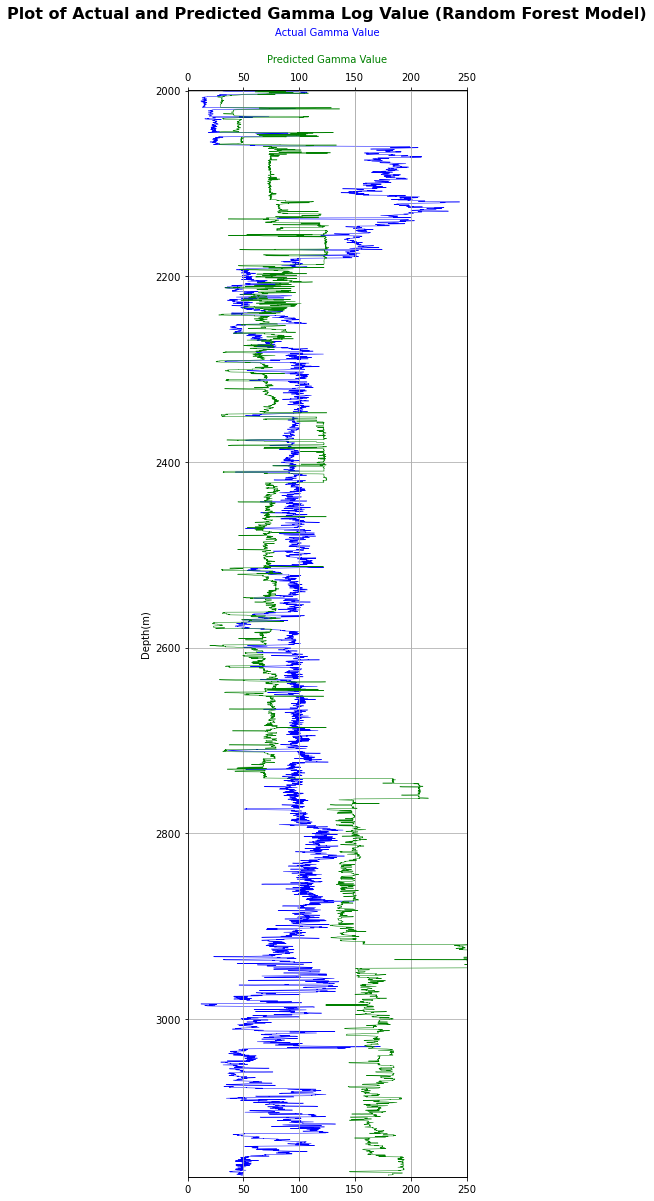

In [105]:
fig, ((ax1))= plt.subplots(nrows=1,
                                    ncols=1,
                                    figsize=(5,20))
ax1.plot("actual values", "DEPT", data=reg_df, color="blue", lw=0.5)
ax1.set(xlabel="Actual Gamma Value",
      ylabel="Depth(m)",
       xlim=(0, 250),
       ylim=(3170, 1999))
ax1.grid()

ax2 = ax1.twiny()
ax2.plot("predicted values", "DEPT", data=reg_df, color="green", lw=0.5)
ax2.set(xlabel="Predicted Gamma Value",
        xlim=(0, 250),
       ylim=(3170, 1999))
ax2.grid()


# Set the color of x-axis labels
ax1.xaxis.label.set_color('blue')
ax2.xaxis.label.set_color('green')


ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")

# Set the position coordinate of x-axis labels higher
ax1.xaxis.set_label_coords(0.5, 1.05)
ax2.xaxis.set_label_coords(0.5, 1.025)

plt.title("Plot of Actual and Predicted Gamma Log Value (Random Forest Model)", fontsize=16, fontweight="bold", y=1.06)